In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


In [ ]:
# import something
master_df = pd.read_csv('../datasets/MASTER_DF.csv')
master_df.columns

In [ ]:
feature_df = master_df[['PubChem', 'dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
        'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU']]
feature_df.set_index(keys=['PubChem'], inplace=True)
feature_df.head()

In [4]:
full_feature = master_df[['dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW']]
full_feature.head()

full_features = np.array(full_feature) #shape balance array for regression
full_reactions = list(master_df['reacts'])

full_feature_train, full_feature_test, full_reaction_train, full_reaction_test = train_test_split(full_features, full_reactions,
                                                    test_size=0.20, random_state=42)

In [5]:
features = np.array(feature_df) #shape balance array for regression
reactions = list(master_df['reacts'])

feature_train, feature_test, reaction_train, reaction_test = train_test_split(features, reactions,
                                                    test_size=0.20, random_state=42)

In [ ]:
model_1 = linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, class_weight='balanced')
model_1.fit(feature_train, np.ravel(reaction_train))

predictions = model_1.predict(feature_test) # change me to the data you want to predict based on 

score = model_1.score(feature_test, reaction_test)
decision = model_1.decision_function(feature_test)
params = model_1.get_params()
pred_log = model_1.predict_log_proba(feature_test)

pred = model_1.predict_proba(feature_test)

score, pred, decision, model_1.classes_, model_1.coef_

In [ ]:
prediction_values = pd.DataFrame(pred)
model_descriptive_df = pd.DataFrame()
model_descriptive_df['0']=prediction_values[0]
model_descriptive_df['1']=prediction_values[1]
model_descriptive_df

In [ ]:
updated = predictions.tolist()
confusion_matrix = confusion_matrix(reaction_test, updated)
print(confusion_matrix)
# upper left and lower right are correct: 1427
# lower left and upper right are incorrect : 99 

In [ ]:
print(classification_report(reaction_test, predictions))

In [ ]:
model_2 = linear_model.LogisticRegressionCV(solver='liblinear', penalty='l1', random_state=1, cv=10)
model_2.fit(feature_train, np.ravel(reaction_train))
predictions2 = model_2.predict(feature_test)
score2 = model_2.score(feature_test, reaction_test)
decision2 = model_2.decision_function(feature_test)
params2 = model_2.get_params()
pred_log2 = model_2.predict_log_proba(feature_test)
pred2 = model_2.predict_proba(feature_test)

score2, pred2, #decision2, model_2.classes_, model_2.coef_

plan: ridge regression, drop off the least important features and get the AUC ROC curve-> store, drop the last
RFE again? (it didn't show anything...)


______________
# linear regression on default data

logreg1=linear_model.LogisticRegression(random_state=1)        
logreg1.fit(feature_train, np.ravel(reaction_train)) #fit linear model, and shape default array for regression
score = logreg1.score(feature_test, reaction_test)
decision = logreg1.decision_function(feature_test)
params = logreg1.get_params()
pred_log = logreg1.predict_log_proba(feature_test)
pred = logreg1.predict_proba(feature_test)

score, pred, logreg1.classes_, logreg1.coef_ #np.ndarray.shape(pred)

#print('B0, B1: ',logreg.intercept_, logreg.coef_[0])

predictions1 = logreg1.predict(feature_test)
confusion_matrix = confusion_matrix(reaction_test, predictions1)
print(confusion_matrix)
# upper left and lower right are correct: 1400 for the first go
# lower left and upper right are incorrect : 111 for the first go

print(classification_report(reaction_test, predictions1))

logit_roc_auc = roc_auc_score(reaction_test, logreg1.predict(feature_test))
fpr, tpr, thresholds = roc_curve(reaction_test, logreg1.predict_proba(feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.scatter(reaction_test, predictions1, alpha=0.1)
plt.xlabel('True value')
plt.ylabel('Predicted value')

logreg5 = linear_model.LogisticRegression(penalty='l1', random_state=1)
logreg5.fit(feature_train, np.ravel(reaction_train))
predictions5 = logreg5.predict(feature_test)
score = logreg5.score(feature_test, reaction_test)
decision = logreg5.decision_function(feature_test)
params = logreg5.get_params()
pred_log = logreg5.predict_log_proba(feature_test)
pred = logreg5.predict_proba(feature_test)

score, pred, logreg5.classes_, logreg5.coef_

print(classification_report(reaction_test, predictions5))

logit_roc_auc = roc_auc_score(reaction_test, logreg5.predict(feature_test))
fpr, tpr, thresholds = roc_curve(reaction_test, logreg5.predict_proba(feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [6]:
from sklearn.feature_selection import RFE



In [ ]:
rfe_results = pd.DataFrame(columns=['score']) 

rank_array = np.zeros((14,15))

for i in range(1,14):
    logreg2=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

    rfe = RFE(logreg2, i)
    rfe = rfe.fit(feature_train, np.ravel(reaction_train))
    score = rfe.score(feature_test, reaction_test)

    rfe_results.loc[i, 'score'] = score
    for j in range(0,14):  
        rank_array[i, j] = rfe.ranking_[j]

In [ ]:
rank_df = pd.DataFrame(rank_array, columns=['dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'drop'])
#rfe_results
rank_df.drop(rank_df.index[0], inplace=True)
rank_df.drop(['drop'], axis=1, inplace=True)
rank_df

In [ ]:
rank_df.sum(axis=0), rfe_results

In [7]:

rfe_results = pd.DataFrame(columns=['score']) 

rank_array = np.zeros((17,18))

for i in range(1,17):
    logreg2=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

    rfe = RFE(logreg2, i)
    rfe = rfe.fit(full_feature_train, np.ravel(full_reaction_train))
    score = rfe.score(full_feature_test, full_reaction_test)

    rfe_results.loc[i, 'score'] = score
    for j in range(0,17):  
        rank_array[i, j]= rfe.ranking_[j]
        

In [8]:
rank_df = pd.DataFrame(rank_array, columns=['dist', 'class_1', 'class_2', 'class_3',
       'class_4', 'class_5', 'class_6', 'class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW', 'drop'])
#rfe_results
rank_df.drop(rank_df.index[0], inplace=True)
rank_df.drop(['drop'], axis=1, inplace=True)
rank_df

,dist,class_1,class_2,class_3,class_4,class_5,class_6,class_7,n_C,n_H,n_O,n_N,n_P,n_S,n_X,DoU,MW
1,1.0,16.0,6.0,5.0,2.0,3.0,11.0,15.0,17.0,12.0,10.0,9.0,13.0,7.0,4.0,8.0,14.0
2,1.0,15.0,5.0,4.0,1.0,2.0,10.0,14.0,16.0,11.0,9.0,8.0,12.0,6.0,3.0,7.0,13.0
3,1.0,14.0,4.0,3.0,1.0,1.0,9.0,13.0,15.0,10.0,8.0,7.0,11.0,5.0,2.0,6.0,12.0
4,1.0,13.0,3.0,2.0,1.0,1.0,8.0,12.0,14.0,9.0,7.0,6.0,10.0,4.0,1.0,5.0,11.0
5,1.0,12.0,2.0,1.0,1.0,1.0,7.0,11.0,13.0,8.0,6.0,5.0,9.0,3.0,1.0,4.0,10.0
6,1.0,11.0,1.0,1.0,1.0,1.0,6.0,10.0,12.0,7.0,5.0,4.0,8.0,2.0,1.0,3.0,9.0
7,1.0,10.0,1.0,1.0,1.0,1.0,5.0,9.0,11.0,6.0,4.0,3.0,7.0,1.0,1.0,2.0,8.0
8,1.0,9.0,1.0,1.0,1.0,1.0,4.0,8.0,10.0,5.0,3.0,2.0,6.0,1.0,1.0,1.0,7.0
9,1.0,8.0,1.0,1.0,1.0,1.0,3.0,7.0,9.0,4.0,2.0,1.0,5.0,1.0,1.0,1.0,6.0
10,1.0,7.0,1.0,1.0,1.0,1.0,2.0,6.0,8.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,5.0


In [9]:
rank_df.sum(axis=0)
# lose MW, n_X, 

classes=['dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW']
scores=[16.0,136.0,31.0,26.0,17.0,19.0,71.0,121.0,152.0,82.0,61.0,52.0,94.0,37.0,22.0,44.0,107.0]  

df_raw=pd.DataFrame([['dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW'],
[16.0,136.0,31.0,26.0,17.0,19.0,71.0,121.0,152.0,82.0,61.0,52.0,94.0,37.0,22.0,44.0,107.0]])
df_raw.columns=df_raw.iloc[0]
df_raw.reindex(df_raw.index.drop(0))
df_raw.sort_values(by='1, inplace=True)

SyntaxError: EOL while scanning string literal (<ipython-input-9-151746c8ab22>, line 15)

In [10]:
make_df = pd.DataFrame(rank_df.sum(axis=0), columns=['score'])
make_df.sort_values('score', axis=0, inplace=True)

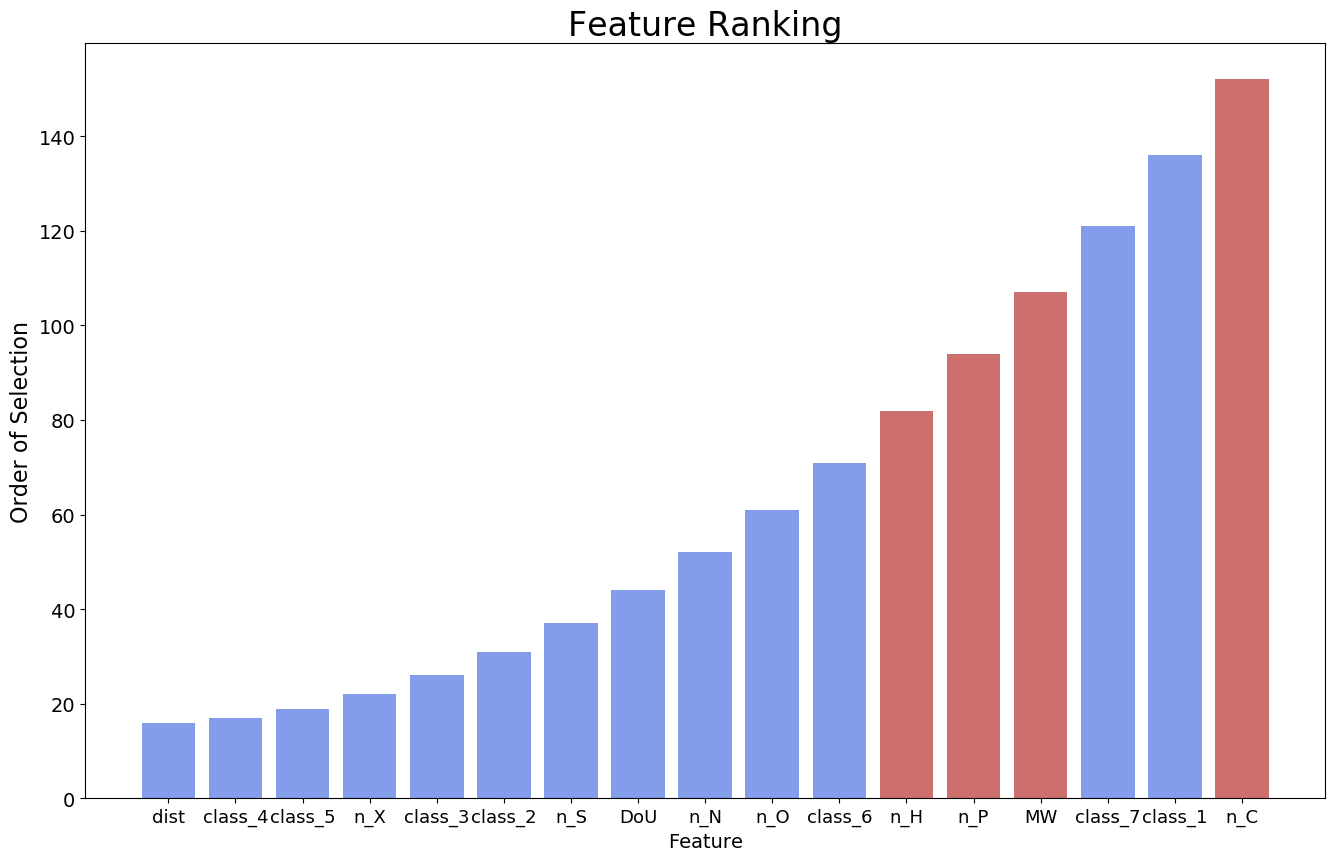

In [13]:
import matplotlib.patches as patches

a = 'firebrick'
b = 'royalblue'
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 100)
ax.bar(x=make_df.index, y=0, height=make_df.score, color=[b,b,b,b,b,b,b,b,b,b,b,a,a,a,b,b,a], alpha=0.65, linewidth=18)
ax.set_title('Feature Ranking', fontsize=24)
ax.set_ylabel('Order of Selection', fontsize=16)
ax.set_xlabel('Feature', fontsize=14)
ax.set_xticklabels(labels=make_df.index, fontsize=13)
ax.set_yticklabels(labels=['0','20','40','60','80','100','120','140'],fontsize=14)

plt.show()
fig.savefig('Feature Rankings.png')

In [ ]:
rfe_results

In [ ]:
logreg2.fit(full_feature_train, np.ravel(full_reaction_train))
logit_roc_auc = roc_auc_score(full_reaction_test, logreg2.predict(full_feature_test))
fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg2.predict_proba(full_feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
logreg2.fit(feature_train, np.ravel(reaction_train))
logit_roc_auc = roc_auc_score(reaction_test, logreg2.predict(feature_test))
fpr, tpr, thresholds = roc_curve(reaction_test, logreg2.predict_proba(feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
feature_df.columns

In [ ]:
non_enzyme_feature_df = feature_df.copy()
non_enzyme_feature_df.drop(['enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7'], axis=1, inplace=True)
non_enzyme_feature_df



In [ ]:
features = np.array(non_enzyme_feature_df) #shape balance array for regression
reactions = list(master_df['reacts'])

feature_train, feature_test, reaction_train, reaction_test = train_test_split(features, reactions,
                                                  test_size=0.20, random_state=42)

In [ ]:
non_enzyme_rfe_results = pd.DataFrame(columns=['score']) 

non_enzyme_rank_array = np.zeros((11,11))

for i in range(1,11):
    logreg2=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

    rfe = RFE(logreg2, i)
    rfe = rfe.fit(feature_train, np.ravel(reaction_train))
    score = rfe.score(feature_test, reaction_test)

    non_enzyme_rfe_results.loc[i, 'score'] = score
    for j in range(0,10):  
        non_enzyme_rank_array[i, j] = rfe.ranking_[j]
        

In [ ]:
non_enzyme_rank_df = pd.DataFrame(non_enzyme_rank_array, columns=['dist',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW', 'drop'])
#rfe_results
non_enzyme_rank_df.drop(non_enzyme_rank_df.index[0], inplace=True)
non_enzyme_rank_df.drop(['drop'], axis=1, inplace=True)
non_enzyme_rank_df

In [ ]:
non_enzyme_rank_df.sum(axis=0)
# ditch n_N, MW, n_H, n_P

In [ ]:
features = list(master_df['dist']) #shape balance array for regression
reactions = list(master_df['reacts'])

feature_train, feature_test, reaction_train, reaction_test = train_test_split(features, reactions,
                                                  test_size=0.20, random_state=42)
a = len(feature_train)
b = len(feature_test)
feature_train = np.reshape(feature_train, (a, 1))
feature_test = np.reshape(feature_test, (b,1))

In [ ]:

dist_only_model=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

dist_only_model.fit(feature_train, np.ravel(reaction_train))

predictions = dist_only_model.predict(feature_test) # change me to the data you want to predict based on 

score = dist_only_model.score(feature_test, reaction_test)
decision = dist_only_model.decision_function(feature_test)
params = dist_only_model.get_params()
pred_log = dist_only_model.predict_log_proba(feature_test)

pred = dist_only_model.predict_proba(feature_test)

score, pred, decision, dist_only_model.classes_, dist_only_model.coef_
        

kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(features, reactions)

int_reactions = [int(i) for i in reactions]


for train_index, test_index in kf.split(features, reactions):
    #print("TRAIN:", train_index, "TEST:", test_index)
    feature_train, feature_test = features[train_index], features[test_index]
    reaction_train, reaction_test = np.array(int_reactions)[train_index], np.array(int_reactions)[test_index]

    reg = linear_model.LogisticRegression().fit(feature_train, reaction_train)
    y_pred = reg.predict(feature_test)

 

print(classification_report(reaction_test, y_pred))

logit_roc_auc = roc_auc_score(reaction_test, reg.predict(feature_test))
fpr, tpr, thresholds = roc_curve(reaction_test, reg.predict_proba(feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.scatter(reaction_test, y_pred, alpha=0.1)
plt.xlabel('True value')
plt.ylabel('Predicted value')

logreg3 = linear_model.LogisticRegression(solver='sag', max_iter=100000)
logreg3.fit(feature_train, np.ravel(reaction_train))
predictions3 = logreg3.predict(feature_test)

confusion_matrix = confusion_matrix(reaction_test, predictions3)
print(confusion_matrix)

print(classification_report(reaction_test, predictions3))

logit_roc_auc = roc_auc_score(reaction_test, logreg3.predict(feature_test))
fpr, tpr, thresholds = roc_curve(reaction_test, logreg3.predict_proba(feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

logreg4 = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logreg4.fit(feature_train, np.ravel(reaction_train))
predictions4 = logreg4.predict(feature_test)

logit_roc_auc = roc_auc_score(reaction_test, logreg4.predict(feature_test))
fpr, tpr, thresholds = roc_curve(reaction_test, logreg4.predict_proba(feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(classification_report(reaction_test, predictions4))